# Actividad Titanic

Priscila Cervantes


Monica Ibarra

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('C:/Users/prisc/apps/data-analytics-course/data/raw/Titanic-Dataset.csv')

In [4]:
df.columns = ["Passenger_#", "Survivor", "P_class", "Name", "Sex","Age", "#_siblings", "Parch", "Ticket", "Fare","Cabin","Embarked"]
df

,Passenger_#,Survivor,P_class,Name,Sex,Age,#_siblings,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### ¿Cuántos pasajeros murieron y sobrevivieron?

In [17]:
sobrevivientes = df['Survivor'].value_counts()
no_sob = 0
sob = 0

for valor, cantidad in sobrevivientes.items():
    if valor == 0:
        no_sob = cantidad
        print('No sobrevivieron:', no_sob)
    else:
        sob = cantidad
        print('Sobrevivieron:', sob)

No sobrevivieron: 549
Sobrevivieron: 342


### Cálculo de IQR

In [18]:
IQR = df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
print('IQR: ', IQR)

IQR:  23.0896


### Cálculo del límite inferiror y superior

In [19]:
lower = df.Fare.quantile(0.25)-1.5*IQR
upper = df.Fare.quantile(0.75)+1.5*IQR
print('Lower:',lower,'Upper:',upper)

Lower: -26.724 Upper: 65.6344


### Pasajeros que pagaron demasiado por el boleto 
$$
"Anomalías"
$$

In [46]:
anomalias_precios = []

for x, precio in enumerate(df['Fare']):
    if precio < lower or precio > upper:
        anomalias_precios.append((precio, df.loc[x, 'Name']))
for precio, nombre in anomalias_precios:
    print('Anomalía de precio: $', precio, '-', nombre)



Anomalía de precio: $ 71.2833 - Cumings, Mrs. John Bradley (Florence Briggs Thayer)
Anomalía de precio: $ 263.0 - Fortune, Mr. Charles Alexander
Anomalía de precio: $ 146.5208 - Spencer, Mrs. William Augustus (Marie Eugenie)
Anomalía de precio: $ 82.1708 - Meyer, Mr. Edgar Joseph
Anomalía de precio: $ 76.7292 - Harper, Mrs. Henry Sleeper (Myna Haxtun)
Anomalía de precio: $ 80.0 - Icard, Miss. Amelie
Anomalía de precio: $ 83.475 - Harris, Mr. Henry Birkhardt
Anomalía de precio: $ 73.5 - Hood, Mr. Ambrose Jr
Anomalía de precio: $ 263.0 - Fortune, Miss. Mabel Helen
Anomalía de precio: $ 77.2875 - White, Mr. Richard Frasar
Anomalía de precio: $ 247.5208 - Baxter, Mr. Quigg Edmond
Anomalía de precio: $ 73.5 - Hickman, Mr. Stanley George
Anomalía de precio: $ 77.2875 - White, Mr. Percival Wayland
Anomalía de precio: $ 79.2 - Giglio, Mr. Victor
Anomalía de precio: $ 66.6 - Pears, Mrs. Thomas (Edith Wearne)
Anomalía de precio: $ 69.55 - Sage, Master. Thomas Henry
Anomalía de precio: $ 69.55 - 

In [49]:
print(len(anomalias_precios))

116


"116 pasajeros pagaron más del promedio del costo de ticket"

### Cálculo de promedio del costo del ticket

In [32]:
promedio=df['Fare'].mean()
print('Promedio del costo del boleto es de:',promedio)

Promedio del costo del boleto es de: 32.204207968574636


### Cálculo de la media del costo del ticket

In [33]:
mediana=df['Fare'].median()
print('La mediana del costo del boleto es de:',mediana)

La mediana del costo del boleto es de: 14.4542


### Cálculo de la moda del costo del ticket

In [35]:
moda=df['Fare'].mode()[0]
print('La moda del costo del boleto es de:',moda)

La moda del costo del boleto es de: 8.05


### Cálculo de la varianza de las edades

In [36]:
varianza=df['Age'].var()
print('La varianza de las edades es de:',varianza)

La varianza de las edades es de: 211.01912474630802


### Probabilidad de supervivencia entre un hombre de 70 y una mujer de 40 años

In [38]:
H_70 = df[(df['Sex'] == 'male') & (df['Age'] == 70)]
M_40 = df[(df['Sex'] == 'female') & (df['Age'] == 40)]
Proba_H = H_70['Survivor'].mean()
Proba_M = M_40['Survivor'].mean()
print("Tasa de supervivencia para hombres de 70 años:", Proba_H)
print("Tasa de supervivencia para mujeres de 40 años:", Proba_M)


Tasa de supervivencia para hombres de 70 años: 0.0
Tasa de supervivencia para mujeres de 40 años: 0.8333333333333334



"La mujer de 40 años tiene más probabilidad de sobrevivir que el hombre de 70 años."

### Distribución de las edades (sobrevivieron o no sobrevivieron)

In [40]:
sobrevivieron = df[df['Survivor'] == 1]['Age']
info_sobrevivieron = sobrevivieron.describe()
no_sobrevivieron = df[df['Survivor'] == 0]['Age']
info_no_sobrevivieron = no_sobrevivieron.describe()
print("Estadísticas de las edades para los pasajeros que sobrevivieron:")
print(info_sobrevivieron)

print("\nEstadísticas de las edades para los pasajeros que no sobrevivieron:")
print(info_no_sobrevivieron)


Estadísticas de las edades para los pasajeros que sobrevivieron:
count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

Estadísticas de las edades para los pasajeros que no sobrevivieron:
count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64


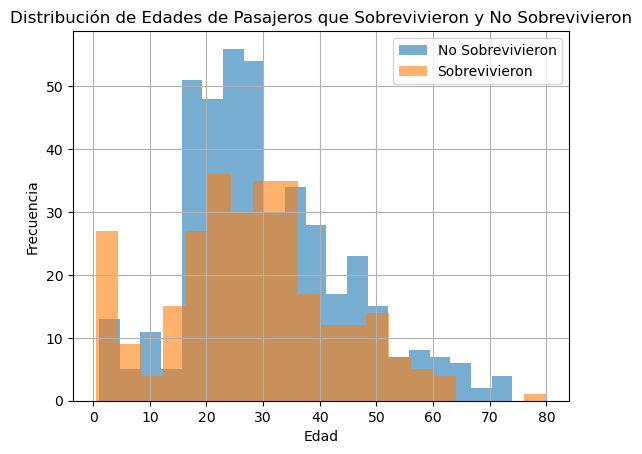

In [43]:
distribucion_edades = df.groupby('Survivor')['Age'].hist(alpha=0.6, bins=20)
plt.legend(['No Sobrevivieron', 'Sobrevivieron'])
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades de Pasajeros que Sobrevivieron y No Sobrevivieron')
plt.show()


### Distribución de género (sobrevivieron o no sobrevivieron)

In [44]:
sobrevivieron = df[df['Survivor'] == 1]['Sex']
info_sobrevivieron = sobrevivieron.describe()
no_sobrevivieron = df[df['Survivor'] == 0]['Sex']
info_no_sobrevivieron = no_sobrevivieron.describe()
print("Estadísticas de géneros para los pasajeros que sobrevivieron:")
print(info_sobrevivieron)

print("\nEstadísticas de géneros para los pasajeros que no sobrevivieron:")
print(info_no_sobrevivieron)

Estadísticas de géneros para los pasajeros que sobrevivieron:
count        342
unique         2
top       female
freq         233
Name: Sex, dtype: object

Estadísticas de géneros para los pasajeros que no sobrevivieron:
count      549
unique       2
top       male
freq       468
Name: Sex, dtype: object


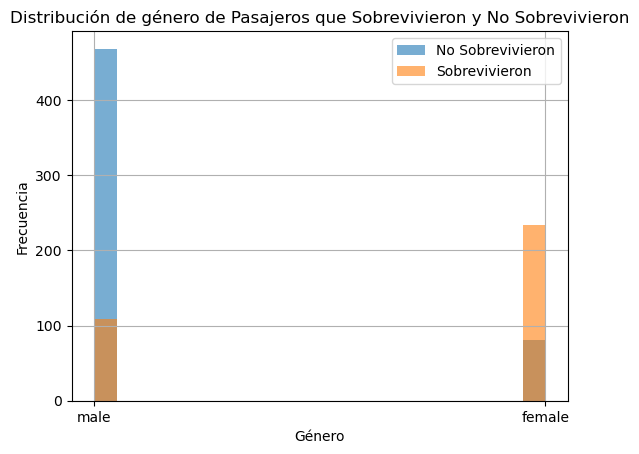

In [45]:
distribucion_género = df.groupby('Survivor')['Sex'].hist(alpha=0.6, bins=20)
plt.legend(['No Sobrevivieron', 'Sobrevivieron'])
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.title('Distribución de género de Pasajeros que Sobrevivieron y No Sobrevivieron')
plt.show()